## <h1 align="center">Make your first prediction with Linear Regression</h1>

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br/>

## Linear Regression in `sklearn`
***

**`sklearn`** provides an easy api to fit a linear regression and predict values using linear regression

Let's see how it works

In [3]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset
***

Let's start by loading the dataset. We'll be using two `.csv` files. One having only one predictor and the other having multiple predictors. Since the target variable(we'll find out what target variables and predictors are below) is **quantitative/continuous**, this is the best for regression problems. 

Let's start loading the data for univariate analysis.

In [4]:
# We have loaded the dataset for Mini Challenges below in the variable 'df' 
# Sales is the target variable and the rest are predictors 

#Import data
df = pd.read_csv('Advertising.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Instructions

* Find the relationship between the predictor and target variables by plotting a scatter plot

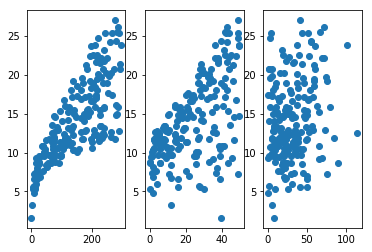

In [5]:
features = df.iloc[:,:-1]
tar = df.iloc[:,-1]
cols= features.columns
fig, axes = plt.subplots(1,3)
for j in range(0,3):
    col=cols[j]
    axes[j].scatter(features[col],tar)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Instructions

* Slice the predictors and target into variables X and y respectively 

In [6]:
X = features
y = tar

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
### Instructions

* Split the dataframe into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` and `random_state = 6`

In [9]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 6)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
### Instructions

* Fit a linear regression model on the training data X_train and y_train.

In [38]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Instructions
* Find the intercept and coefficients for the model fitted above.

In [19]:
model.coef_,model.intercept_

(array([0.04629491, 0.18350797, 0.00364187]), 2.9379108620031875)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
### Instructions
* Predict on the variable `X_test` and create a DataFrame of the actual values and predicted values and find the mean squared error

In [20]:
y_pred = model.predict(X_test)

In [29]:
result = pd.DataFrame({'actual': y_test , 'predicted': y_pred})
result = result.reset_index().drop(['index'] , 1)
result

,actual,predicted
0,15.9,15.817061
1,17.4,17.296187
2,10.1,9.816821
3,16.6,16.413236
4,10.3,9.814529
5,10.8,11.968507
6,22.2,21.514652
7,14.6,14.212551
8,12.9,13.502602
9,11.8,11.704514


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 7
***
### Instructions
* Find the Mean Absolute Error , Root Mean Squared Error and $R^2$ Score

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
rsquared = r2_score(y_test,y_pred)
print('mae=',mae)
print('rmse=',rmse)
print('R2=', rsquared)

mae= 1.23813543797613
rmse= 1.7060513976190634
R2= 0.8598585513768164


## Quiz

Q1. True-False: Linear Regression is a supervised machine learning algorithm.
```python
A) TRUE
B) FALSE

```
Q2. True-False: Linear Regression is mainly used for Regression.
```python
A) TRUE
B) FALSE

```
Q4. Which of the following methods do we use to find the best fit line for data in Linear Regression?
```python
A) Least Square Error
B) Maximum Likelihood
C) Logarithmic Loss
D) Both A and B

```
Q5. Which of the following evaluation metrics can be used to evaluate a model while modeling a continuous output variable?
```python
A) AUC-ROC
B) Accuracy
C) Logloss
D) Mean-Squared-Error

```

# Thank You
***

### Next Session: - 
- Initial Exploration
- Introduction to Seaborn
- Univariate Analysis
- Multi-variate Analysis

For more queries - Reach out to academics@greyatom.com 